# BRISTISH AIRWAYS 


British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.


Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.

The goal is to apply analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business based on recommendations, tools and models drive key business decisions, reduce costs and increase revenue.



---

## Web scraping and analysis

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | We have sat on this plane fo...
1,Not Verified | British Airways stranding my w...
2,✅ Trip Verified | Although like many these d...
3,✅ Trip Verified | This flight was British Airw...
4,Not Verified | The worst airline I have ever f...
5,"✅ Trip Verified | Disappointing service, pla..."
6,✅ Trip Verified | A transit visa is required...
7,✅ Trip Verified | I was surprised to receive...
8,"✅ Trip Verified | Flight cancelled, not refu..."
9,"✅ Trip Verified | I had visa issues, and hen..."


 The loops above collected 1000 reviews by iterating through the paginated pages on the website. 

 The next thing to do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
#df.to_csv("data/BA_reviews.csv")

## Cleaning Data

In [6]:
split_dt = df['reviews'].str.split(pat = '|', expand = True)


df[['status', 'reviews_']] = split_dt

In [7]:
df.head(5)

,reviews,status,reviews_
0,✅ Trip Verified | We have sat on this plane fo...,✅ Trip Verified,We have sat on this plane for an hour and for...
1,Not Verified | British Airways stranding my w...,Not Verified,British Airways stranding my wife and I at H...
2,✅ Trip Verified | Although like many these d...,✅ Trip Verified,"Although like many these days, I avoid BA o..."
3,✅ Trip Verified | This flight was British Airw...,✅ Trip Verified,This flight was British Airways at its very b...
4,Not Verified | The worst airline I have ever f...,Not Verified,The worst airline I have ever flown with. The...


In [8]:
ba_df=df.drop('reviews',axis=1,inplace=False)

In [9]:
ba_df.head(6)

,status,reviews_
0,✅ Trip Verified,We have sat on this plane for an hour and for...
1,Not Verified,British Airways stranding my wife and I at H...
2,✅ Trip Verified,"Although like many these days, I avoid BA o..."
3,✅ Trip Verified,This flight was British Airways at its very b...
4,Not Verified,The worst airline I have ever flown with. The...
5,✅ Trip Verified,"Disappointing service, plane interior and t..."


In [10]:
ba_df.shape

(1000, 2)

We want to analyse the trips that are only verified, so we need to remove rows that do not contain verified trips(Not Verified)


In [11]:
ba_rv = ba_df[~ba_df['status'].str.contains('Not Verified')]

In [12]:
ba_rv.head()

,status,reviews_
0,✅ Trip Verified,We have sat on this plane for an hour and for...
2,✅ Trip Verified,"Although like many these days, I avoid BA o..."
3,✅ Trip Verified,This flight was British Airways at its very b...
5,✅ Trip Verified,"Disappointing service, plane interior and t..."
6,✅ Trip Verified,A transit visa is required for my partner t...


In [13]:
ba_rv.shape

(737, 2)

so we were able to filter and drop rows that are not verified. This that means 262 reviews were not verifed.

-------------------------------------------------------------------------------------------------------------------------------------------------------

## Sentiment Analysis with VADER

Now we want to analyze the customer reviews and carry out sentiment analysis to know reviews that are Positive and Negative

To do this, we would be using a pre-trained sentiment analyzer, such as the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool built from the NLTK library.

In [14]:
#import nltk 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [15]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

After loading the necessary dependencies, we need to create an object of the SentimentIntensityAnalyzer model that will be used for predicting the sentiments of text.

In [16]:
# Initialize VADER sentiment analyzer
model = SentimentIntensityAnalyzer()

 let us use the model object to predict the sentiment the reviews using the polarity_scores() method. Then we will get the compound score returned by the model.

In [17]:
# Analyze sentiment
ba_rv['sentiment'] = ba_rv['reviews_'].apply(lambda x: model.polarity_scores(x)['compound'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9172\3885303996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_rv['sentiment'] = ba_rv['reviews_'].apply(lambda x: model.polarity_scores(x)['compound'])


In [18]:
ba_rv.head()

,status,reviews_,sentiment
0,✅ Trip Verified,We have sat on this plane for an hour and for...,-0.8507
2,✅ Trip Verified,"Although like many these days, I avoid BA o...",-0.6663
3,✅ Trip Verified,This flight was British Airways at its very b...,0.9838
5,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848
6,✅ Trip Verified,A transit visa is required for my partner t...,0.0258


 We will treat a compound score with sentiment less than or equal to -0.05 as negative sentiment, a score greater than or equal to 0.05 as positive sentiment, and the score in between as neutral sentiment.

The result from the VADER model is a set of four different numbers that belong to classes such as negative, neutral, positive, and compound. The break up of the score for these classes is as follows:

Negative: It depicts the negative sentiment and its value ranges from 0 to 1.

Neutral: It depicts the neutral sentiment and its value ranges from 0 to 1.

Positive: It depicts the positive sentiment and its value ranges from 0 to 1.

Compound: It provides us the overall sentiment score and its value ranges from -1 to 1, -1 being the strong negative sentiment and 1 being the strong positive sentiment.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

## DATA VISUALIZATION

We would be using the Seaborn to visualize the sentiment score


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

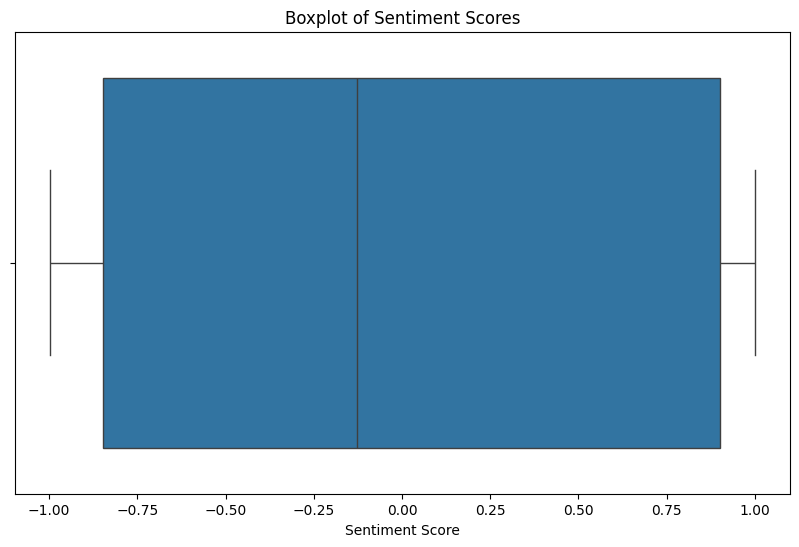

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ba_rv['sentiment'])
plt.title('Boxplot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

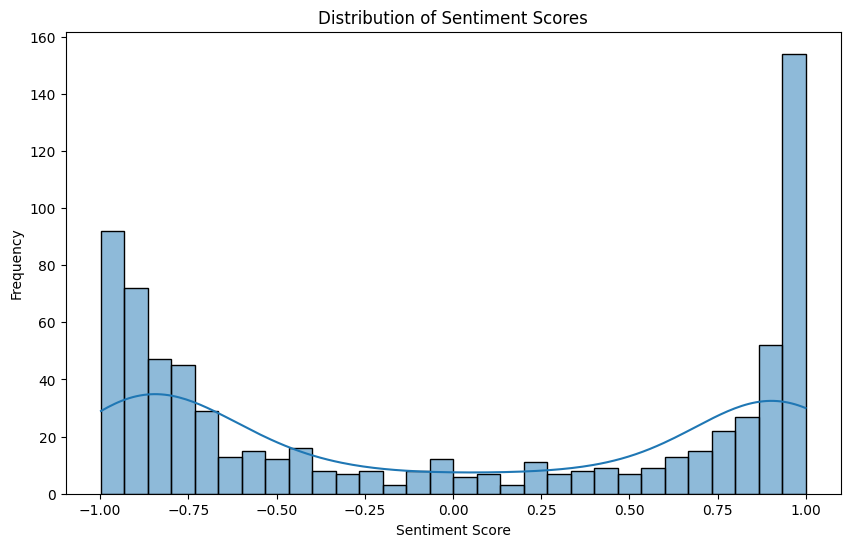

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(ba_rv['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [22]:
ba_rv['sentiment_label'] = ba_rv['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9172\3472902264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_rv['sentiment_label'] = ba_rv['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [23]:
ba_rv.head()

,status,reviews_,sentiment,sentiment_label
0,✅ Trip Verified,We have sat on this plane for an hour and for...,-0.8507,negative
2,✅ Trip Verified,"Although like many these days, I avoid BA o...",-0.6663,negative
3,✅ Trip Verified,This flight was British Airways at its very b...,0.9838,positive
5,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848,negative
6,✅ Trip Verified,A transit visa is required for my partner t...,0.0258,positive


In [24]:
no_pos_rev=ba_rv['sentiment_label'].value_counts()['positive']
no_pos_rev

350

In [25]:
no_neg_rev=ba_rv['sentiment_label'].value_counts()['negative']
no_neg_rev

381

In [26]:
no_neu_rev=ba_rv['sentiment_label'].value_counts()['neutral']
no_neu_rev

6

##  Preprocessing Data

## Topic Modelling With Latent Dirichlet Allocation (LDA)



Preprocessing is a crucial step in topic modeling. It involves cleaning and preparing the text data for analysis. Here are the steps involved:

Tokenization: Splitting the text into individual words or tokens.

Removing Stop Words: Eliminating common words that don't contribute much to the meaning (e.g., "and", "the").

Stemming/Lemmatization: Reducing words to their base or root form (e.g., "running" to "run").

In [27]:
corpus = ba_rv['reviews_']

In [28]:
# Code source: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')  
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]
print(clean_corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['sat', 'plane', 'hour', 'forty', 'five', 'minute', 'awaiting', 'takeoff', 'due', 'bad', 'weather', 'london', 'understandable', 'safety', 'fortunately', 'long', 'layover', 'delay', 'affect', 'me', 'however', 'many', 'others', 'lucky', 'waiting', 'given', 'one', 'small', 'bottle', 'water', 'one', 'tiny', 'pack', 'corn', 'kernel', 'later', 'food', 'drink', 'offered', 'purchase', 'complaint', 'sitting', 'idle', 'plane', 'nearly', 'two', 'hour', 'possibly', 'missing', 'connecting', 'flight', 'can’t', 'give', 'u', 'free', 'bag', 'chip', 'coke', 'asked', 'told', 'no', 'british', 'airway', 'really', 'cheap', 'money', 'grubbing'], ['although', 'like', 'many', 'day', 'avoid', 'ba', 'long', 'haul', 'london', 'heathrow', 'due', 'perception', 'poor', 'service', 'lack', 'customer', 'service', 'thing', 'go', 'wrong', 'pleasantly', 'surprised', 'recent', 'flight', 'belfast', 'aircraft', 'actually', 'left', 'time', 'arrived', 'ahead', 'schedule', 'cabin', 'crew', 'looked', 'bored', 'uninspired', 'oft

In [29]:
import gensim
from gensim import corpora

# Creating document-term matrix 
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(17, 1), (19, 2), (33, 1), (34, 1), (36, 1), (50, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 2), (1

In [30]:

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                       id2word=dictionary,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)


# LSA model
print(lda_model.print_topics(num_topics=10, num_words=3))



[(0, '0.022*"flight" + 0.013*"seat" + 0.012*"ba"'), (1, '0.022*"flight" + 0.016*"ba" + 0.015*"seat"'), (2, '0.015*"seat" + 0.013*"ba" + 0.012*"flight"'), (3, '0.027*"flight" + 0.017*"good" + 0.014*"crew"'), (4, '0.014*"flight" + 0.011*"seat" + 0.011*"british"'), (5, '0.018*"flight" + 0.013*"staff" + 0.012*"service"'), (6, '0.034*"flight" + 0.016*"ba" + 0.011*"hour"'), (7, '0.014*"seat" + 0.011*"charge" + 0.009*"bag"'), (8, '0.010*"ba" + 0.007*"ticket" + 0.007*"sister"'), (9, '0.024*"ba" + 0.020*"seat" + 0.016*"flight"')]


In [31]:
# Extract topic-word distributions
topics = lda_model.show_topics(formatted=False)

# Convert to DataFrame
topic_words = []
for topic in topics:
    topic_id, word_probs = topic
    for word, prob in word_probs:
        topic_words.append((topic_id, word, prob))

df = pd.DataFrame(topic_words, columns=['Topic', 'Word', 'Weight'])

# Sort by Probability
df_sorted = df.sort_values(by='Weight', ascending=False)

# Display top words for each topic
top_words_per_topic = df_sorted.groupby('Topic')
top_words_per_topic.head(7)

,Topic,Word,Weight
60,6,flight,0.033594
30,3,flight,0.027437
90,9,ba,0.024313
0,0,flight,0.022330
10,1,flight,0.022064
...,...,...,...
26,2,passenger,0.006248
46,4,london,0.006090
56,5,back,0.006059
76,7,credit,0.005877


## Analyzing LDA Model result with pyLDAvis

In [32]:
import pyLDAvis 
import pyLDAvis.gensim_models as gensimvis
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.021504 -0.144176       1        1  38.844664
3      0.155495  0.009637       2        1  24.055766
9      0.073919  0.012401       3        1   9.241613
0      0.093228  0.000545       4        1   7.839729
1      0.095796  0.011314       5        1   7.254711
2      0.018054  0.109477       6        1   3.721267
5     -0.083380 -0.071395       7        1   3.042673
4     -0.056115  0.037295       8        1   2.476031
8     -0.154231 -0.055059       9        1   2.196879
7     -0.164271  0.089961      10        1   1.326668, topic_info=        Term         Freq        Total Category  logprob  loglift
244     seat   581.000000   581.000000  Default  30.0000  30.0000
70        ba   881.000000   881.000000  Default  29.0000  29.0000
19    flight  1588.000000  1588.000000  Default  28.0000  28.0000
33    london   439.000000   439.000000  Default  27.0000  27.0000
5        bag   194.000000   194.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
299    phone     2.790559    72.935820  Topic10  -5.6745   1.0592
271      via     2.767783    96.059114  Topic10  -5.6827   0.7756
104     time     2.997321   486.887162  Topic10  -5.6030  -0.7678
1063     row     2.678023    64.717919  Topic10  -5.7156   1.1375
356       in     2.658375    53.854635  Topic10  -5.7230   1.3139

[804 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1942      1  0.305121    14
1942      4  0.101707    14
1942      5  0.101707    14
1942      8  0.406827    14
5198      6  0.397196  1900
...     ...       ...   ...
758       5  0.042571  year
758       6  0.010643  year
758       7  0.042571  year
758       8  0.010643  year
4291      6  0.924417  £499

[1841 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 10, 1, 2, 3, 6, 5, 9, 8])

## Measuring performance of LDA


1. Perplexity
Perplexity is a commonly used metric to evaluate the performance of topic models, including LDA. It measures how well the model predicts a sample of unseen data. Lower perplexity indicates a better generalization performance of the model.

2. Coherence Score
Coherence score measures the degree of semantic similarity between high scoring words in the topic. There are several types of coherence measures, such as C_v, UMass, and C_uci. A higher coherence score generally indicates more interpretable topics.

In [45]:

from gensim.models import CoherenceModel


# Compute Perplexity
perplexity = lda_model.log_perplexity(doc_term_matrix)
print(f'Perplexity: {perplexity}')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


Perplexity: -7.672614967839563
Coherence Score: 0.32856536092617106
